In [1]:
import pandas as pd
import html5lib
import seaborn as sns
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [2]:
per_capita_gdp = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita')

In [3]:
gdp_per_capita = per_capita_gdp[2]
gdp_per_capita

,Rank,Country/Territory,US$
0,1,Luxembourg (EU),113196
1,2,Switzerland,83716
2,—,Macau,81151
3,3,Norway,77975
4,4,Ireland (EU),77771
...,...,...,...
188,182,Niger,405
189,183,Malawi,370
190,184,Eritrea,342
191,185,Burundi,309


In [4]:
population = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)')

In [5]:
population = population[3]

In [6]:
nominalGDP = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)')

In [7]:
nominalGDP = nominalGDP[7]

In [8]:
gdp_per_capita.head()

,Rank,Country/Territory,US$
0,1,Luxembourg (EU),113196
1,2,Switzerland,83716
2,—,Macau,81151
3,3,Norway,77975
4,4,Ireland (EU),77771


In [9]:
gdp_per_capita= gdp_per_capita.drop(columns='Rank')

In [10]:
population.head()

,Country/Territory,UN continentalregion[4],UN statisticalsubregion[4],Population(1 July 2018),Population(1 July 2019),Change
0,China[a],Asia,Eastern Asia,1427647786,1433783686,+0.43%
1,India,Asia,Southern Asia,1352642280,1366417754,+1.02%
2,United States,Americas,Northern America,327096265,329064917,+0.60%
3,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
4,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%


In [11]:
list = population.iloc[:, [3, 2, 5]]

In [12]:
population = population.drop(list, axis=1)

In [13]:
population.head()

,Country/Territory,UN continentalregion[4],Population(1 July 2019)
0,China[a],Asia,1433783686
1,India,Asia,1366417754
2,United States,Americas,329064917
3,Indonesia,Asia,270625568
4,Pakistan,Asia,216565318


In [14]:
x= pd.merge(population, gdp_per_capita)

In [15]:
x.head()

,Country/Territory,UN continentalregion[4],Population(1 July 2019),US$
0,India,Asia,1366417754,2171
1,United States,Americas,329064917,65111
2,Indonesia,Asia,270625568,4163
3,Pakistan,Asia,216565318,1388
4,Brazil,Americas,211049527,8796


In [16]:
x = x.rename(columns={'UN continentalregion[4]':'Continent', 'Population(1 July 2019)': 'Population', 'US$': 'GDP', 'Country/Territory':'Country'})

In [17]:
x

,Country,Continent,Population,GDP
0,India,Asia,1366417754,2171
1,United States,Americas,329064917,65111
2,Indonesia,Asia,270625568,4163
3,Pakistan,Asia,216565318,1388
4,Brazil,Americas,211049527,8796
...,...,...,...,...
137,San Marino,Europe,33860,47279
138,Palau,Oceania,18008,16736
139,Tuvalu,Oceania,11646,3834
140,Nauru,Oceania,10756,8270


In [18]:
x_data = x['Population']

In [19]:
y_data = x['GDP']

In [20]:
nominalGDP.head()

,Rank,Country/Territory,GDP(US$million)
0,NaN,World[19],87265226
1,1,United States,21439453
2,—,European Union[22][n 1],18705132
3,2,China[n 2],14140163
4,3,Japan,5154475


In [27]:
z_data = nominalGDP['GDP']

In [ ]:
g = sns.scatterplot(y_data, x_data, hue=x['Country'])
g.legend(loc='best', bbox_to_anchor=(1.25, 0.5), ncol=2)
plt.yscale('log')
plt.title('Population Vs. Per-Capita')
plt.xlabel('Per-Capita Income')
plt.grid()
plt.savefig('Population Vs Per-Capita income.png', dpi=500)

In [ ]:
gdp_per_capita.head()

In [ ]:
gdp_per_capita.rename(columns={'Country/Territory':'Country', 'US$':'GDP'}, inplace=True)

In [ ]:
gdp_per_capita.plot('Country', 'GDP',kind='barh',figsize=(15,20))
plt.savefig('gdppercapita.png', dpi=500)

In [ ]:
gdp_per_capita.plot('Country', 'GDP',kind='bar',figsize=(25,8))
plt.yscale('log')
plt.xlabel('Countries')
plt.ylabel('Per Capita Income in Dollars')
plt.savefig('GDP1.png')

In [22]:
nominalGDP

,Rank,Country/Territory,GDP(US$million)
0,NaN,World[19],87265226
1,1,United States,21439453
2,—,European Union[22][n 1],18705132
3,2,China[n 2],14140163
4,3,Japan,5154475
...,...,...,...
189,182,Palau,291
190,183,Marshall Islands,220
191,184,Kiribati,184
192,185,Nauru,108


In [23]:
nominalGDP.rename(columns={'Country/Territory':'Country', 'GDP(US$million)':'GDP'}, inplace=True)

In [24]:
nominalGDP = nominalGDP.drop(nominalGDP.index[[0,2]])

In [25]:
nominalGDP['Country'].replace('China[n 2]', 'China', inplace=True)

In [26]:
nominalGDP

,Rank,Country,GDP
1,1,United States,21439453
3,2,China,14140163
4,3,Japan,5154475
5,4,Germany,3863344
6,5,India,2935570
...,...,...,...
189,182,Palau,291
190,183,Marshall Islands,220
191,184,Kiribati,184
192,185,Nauru,108


In [ ]:
gdp_per_capita.plot('Country', 'GDP',kind='bar',figsize=(25,8))
plt.yscale('log')
plt.xlabel('Countries')
plt.ylabel('Per Capita Income in Dollars')
plt.title('Per Capita')
plt.savefig('PerCapita.png', dpi=500)

In [ ]:
GDP_continent = pd.read_html('https://en.wikipedia.org/wiki/List_of_continents_by_GDP_(nominal)')

In [ ]:
GDP_continent = GDP_continent[3]

In [ ]:
GDP_continent

In [ ]:
GDP_continent.rename(columns={'GDP(Inter$billions)': 'GDP'}, inplace=True)
GDP_continent.drop(['Rank', 'Year'], axis=1, inplace=True)

In [ ]:
GDP_continent.drop(GDP_continent.index[[0,7]], inplace=True)

In [ ]:
GDP_continent

In [ ]:
sns.scatterplot(x=GDP_continent['Continent'], y=GDP_continent['GDP'], hue=GDP_continent['Continent'])
#plt.savefig('continent.png', dpi=500)
plt.figure(figsize=(5,5))
#plt.legend(loc='best', bbox_to_anchor=(1.25, 0.5), ncol=2)

In [ ]:
GDP_continent.plot('Continent', 'GDP',kind='bar',figsize=(12,8))
plt.xlabel('Continents')
plt.ylabel('GDP')
plt.title('GDP Across Continents')
plt.savefig('GDP Across Continents.png', dpi=500)

In [ ]:
population.head()

In [ ]:
population.rename(columns={'Country/Territory':'Country', 'UN continentalregion[4]':'Continent', 'Population(1 July 2019)':'Population'},
                 inplace=True)

In [ ]:
population.head()

In [ ]:
population['Country'].replace('China[a]', 'China', inplace=True)

In [ ]:
population

In [ ]:
life_exp = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy')
life_exp = life_exp[4]

In [ ]:
life_exp.head()

In [ ]:
life_exp.drop(columns=['Male', 'Female', 'Health-adjusted(both)[18]'], axis=1, inplace=True)

In [ ]:
life_exp.head()

In [ ]:
life_exp.rename(columns={'Both':'Expectancy'}, inplace=True)

In [ ]:
life_exp.plot('Country', 'Expectancy', kind='barh', figsize=(15,50))
plt.savefig('Life Expectancy.png', dpi=500)

In [ ]:
life_exp.plot('Country', 'Expectancy', kind='bar', figsize=(20,10))
plt.savefig('Life Expectancy2.png', dpi=500)

In [ ]:
sns.scatterplot(x=life_exp['Country'], y=life_exp['Expectancy'], hue=life_exp['Country'])
plt.legend(loc='best', bbox_to_anchor=(1.25, 0.5), ncol=2)
plt.figure(figsize=(20,5))

In [ ]:
nominalGDP.head()

In [ ]:
sns.scatterplot(x=life_exp['Expectancy'],y=gdp_per_capita['GDP'], hue=gdp_per_capita['Country'])
plt.legend(loc='best', bbox_to_anchor=(1.25, 0.5), ncol=2)
plt.grid()
plt.xlabel('Life Expectancy')
plt.ylabel('Per Capita Income')
plt.title('Life Expectancy Vs. Per Capita Income')
plt.savefig('Life Expectancy Vs. Per Capita Income.png', dpi=500)

In [ ]:
g = sns.scatterplot(y=z_data,x=y_data, hue=x['Country'])
g.legend(loc='best', bbox_to_anchor=(1.25, 0.5), ncol=2)
plt.yscale('log')
plt.title('Population Vs. GDP')
plt.xlabel('Polulation')
plt.grid()
plt.savefig('Population Vs GDP.png', dpi=500)


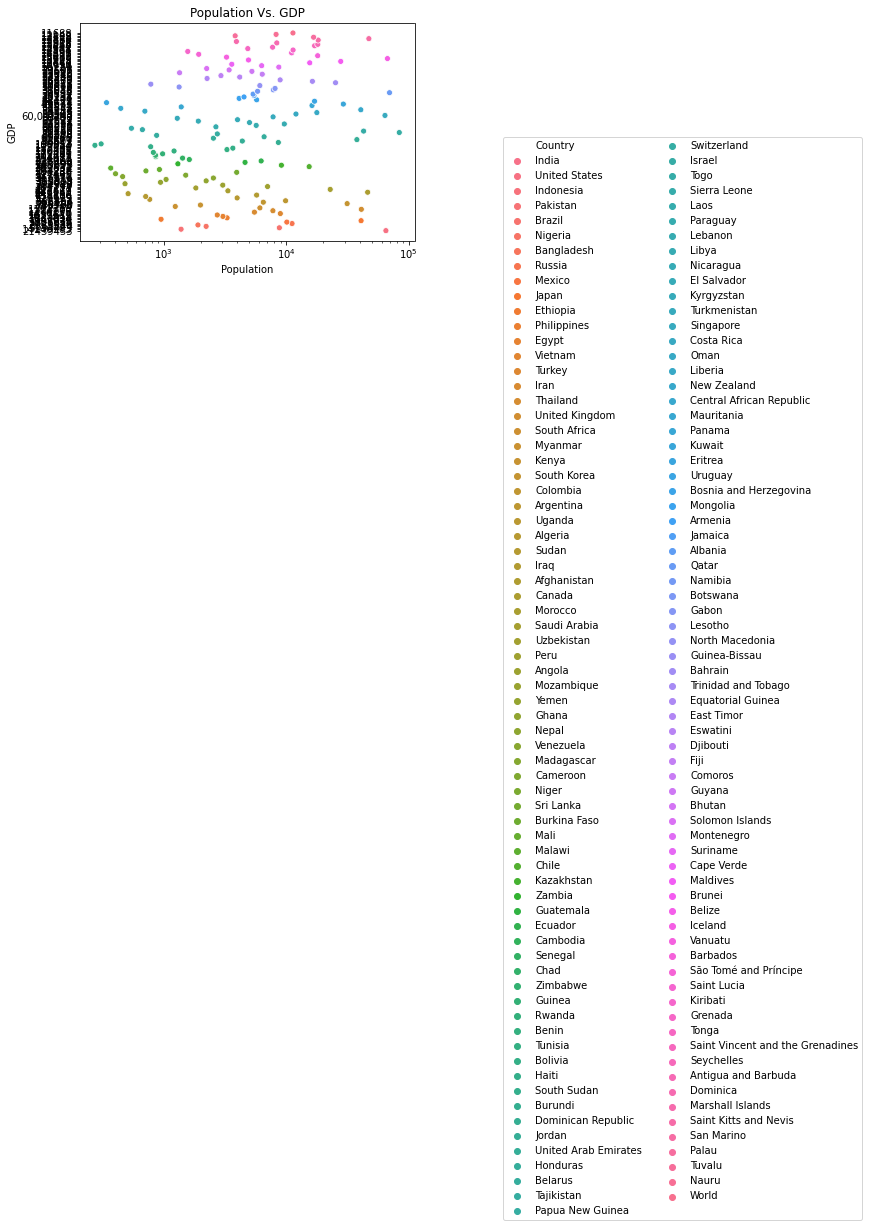

In [33]:
g = sns.scatterplot(y=z_data,x=y_data, hue=x['Country'])
g.legend(loc='best', bbox_to_anchor=(1.25, 0.5), ncol=2)
#plt.yscale('log')
plt.xscale('log')
plt.title('Population Vs. GDP')
plt.xlabel('Population')
plt.savefig('Population Vs GDP2.png', dpi=500)